# PACKAGES AND LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import os.path
from pathlib import Path
import cv2
import glob
from PIL import Image
import imutils
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop,Adam
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# DATA PATH PROCESS

In [ ]:
# mount to the input data
from google.colab import drive
drive.mount('/content/drive')


#### TRAINING

In [5]:
# No_Data_Path = Path("/content/drive/MyDrive/USF/datascience/final_project/data/no")
# Yes_Data_Path = Path("/content/drive/MyDrive/USF/datascience/final_project/data/yes")
No_Data_Path = Path("no")
Yes_Data_Path = Path("yes")

In [6]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [7]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('no/no992.jpg'), PosixPath('no/no80.jpg'), PosixPath('no/no208.jpg'), PosixPath('no/no748.jpg'), PosixPath('no/no686.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('yes/y952.jpg'), PosixPath('yes/y169.jpg'), PosixPath('yes/y613.jpg'), PosixPath('yes/y299.jpg'), PosixPath('yes/y992.jpg')]


In [8]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [9]:
print(Yes_No_List[0:10])

[PosixPath('no/no992.jpg'), PosixPath('no/no80.jpg'), PosixPath('no/no208.jpg'), PosixPath('no/no748.jpg'), PosixPath('no/no686.jpg'), PosixPath('no/no1008.jpg'), PosixPath('no/no70.jpg'), PosixPath('no/no155.jpg'), PosixPath('no/no904.jpg'), PosixPath('no/no811.jpg')]


In [10]:
len(Yes_No_List)

3000

In [11]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [12]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [13]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [14]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [15]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [16]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0      no/no992.jpg             no
1       no/no80.jpg             no
2      no/no208.jpg             no
3      no/no748.jpg             no
4      no/no686.jpg             no
...             ...            ...
2994   yes/y541.jpg            yes
2995  yes/y1075.jpg            yes
2996   yes/y960.jpg            yes
2997  yes/y1189.jpg            yes
2998   yes/y826.jpg            yes

[2999 rows x 2 columns]


#### TESTING

In [17]:
# Prediction_Path = Path("/content/drive/MyDrive/USF/datascience/final_project/data/pred")
Prediction_Path = Path("pred")

In [18]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [19]:
print(Test_JPG_Path[0:5])

[PosixPath('pred/pred18.jpg'), PosixPath('pred/pred28.jpg'), PosixPath('pred/pred31.jpg'), PosixPath('pred/pred21.jpg'), PosixPath('pred/pred44.jpg')]


In [20]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [21]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [22]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [23]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [24]:
print(Test_Data.head())

               JPG TUMOR_CATEGORY
0  pred/pred18.jpg           pred
1  pred/pred28.jpg           pred
2  pred/pred31.jpg           pred
3  pred/pred21.jpg           pred
4  pred/pred44.jpg           pred


# SHUFFLING DATA

In [25]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [26]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0      yes/y575.jpg            yes
1     yes/y1336.jpg            yes
2      yes/y126.jpg            yes
3      no/no225.jpg             no
4       yes/y35.jpg            yes
...             ...            ...
2994   no/no833.jpg             no
2995  yes/y1421.jpg            yes
2996    no/no66.jpg             no
2997   yes/y410.jpg            yes
2998   no/no984.jpg             no

[2999 rows x 2 columns]


# DATA VISUALIZATION

Text(0.5, 1.0, 'yes')

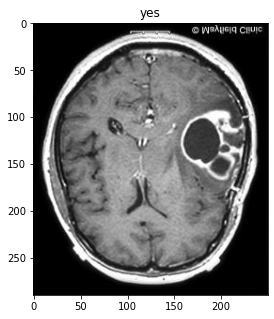

In [27]:
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2])

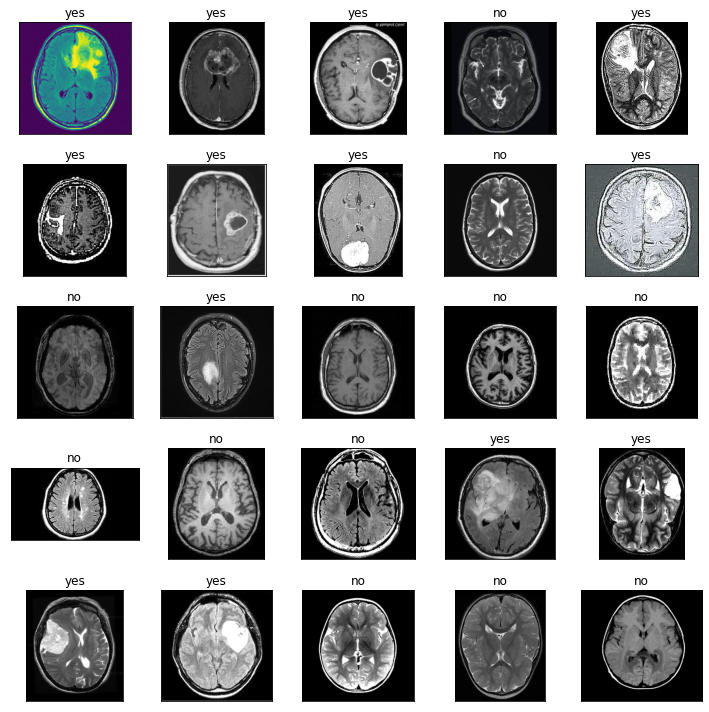

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# DATA PRE-PROCESSING
#### CROPPING IMAGES

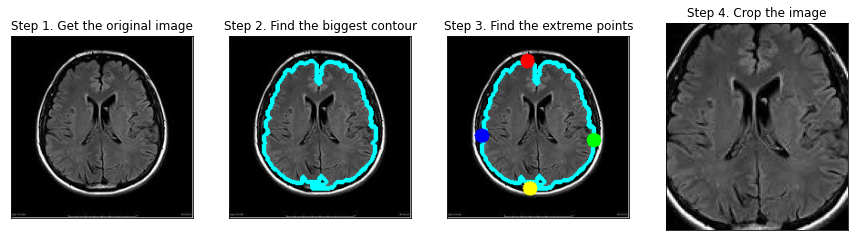

In [31]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)
IMG_SIZE = (200,200)

img = cv2.imread(Main_Train_Data["JPG"][30])
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.savefig("cropping.png")
plt.show()



In [ ]:
# Crop all images
# for image in Main_Train_Data['JPG']:
#     Main_Train_Data['JPG'] = crop_imgs(image)

#### SPLITTING DATA

In [32]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [33]:
print(train_data.shape)
print(test_data.shape)

(2700, 2)
(300, 2)


In [34]:
print(train_data.head())

                JPG TUMOR_CATEGORY
433    yes/y275.jpg            yes
1151   yes/y486.jpg            yes
73    yes/y1155.jpg            yes
1536   no/no820.jpg             no
2709  yes/y1353.jpg            yes


In [35]:
print(test_data.shape)

(300, 2)


In [36]:
print(test_data.head())

                JPG TUMOR_CATEGORY
1801   no/no864.jpg             no
1190   no/no899.jpg             no
1817  yes/y1294.jpg            yes
251   no/no1292.jpg             no
2505  yes/y1422.jpg            yes


#### IMAGE DATA AUGMENTATION

In [37]:
# Generator_Basic = ImageDataGenerator(rescale=1./255,
#                                      validation_split=0.1)
Generator_Basic = ImageDataGenerator(rotation_range=30,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='nearest',
                                      validation_split=0.1,
                                      # rescale= 1/255
                                    )


In [38]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               # color_mode="grayscale",
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


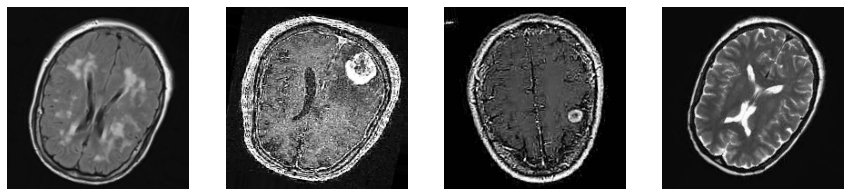

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
# generate batch of images
for i in range(4):

	# convert to unsigned integers
	image = next(Train_Set)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image[0])
	ax[i].axis('off')

In [40]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="rgb",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [41]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [42]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 3)
LABEL SHAPE:  (20, 2)


In [43]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 3)
LABEL SHAPE:  (20, 2)


In [44]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 3)
LABEL SHAPE:  (20, 2)


In [45]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 0, 1]
(200, 200, 3)


In [46]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 0, 1]
(200, 200, 3)


In [47]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 1]
(200, 200, 3)


# CNN MODEL

#### MODEL STRUCTURE

In [76]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,3)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)      

#### MODEL COMPILE

In [77]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [78]:
CNN_model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30)

Epoch 1/30
122/122 [==============================] - 16s 126ms/step - loss: 111.0088 - accuracy: 0.6556 - val_loss: 0.5580 - val_accuracy: 0.7407
Epoch 2/30
122/122 [==============================] - 15s 124ms/step - loss: 0.8791 - accuracy: 0.6992 - val_loss: 0.5596 - val_accuracy: 0.7630
Epoch 3/30
122/122 [==============================] - 15s 124ms/step - loss: 0.5849 - accuracy: 0.7280 - val_loss: 0.5238 - val_accuracy: 0.7370
Epoch 4/30
122/122 [==============================] - 15s 124ms/step - loss: 0.5594 - accuracy: 0.7444 - val_loss: 0.4796 - val_accuracy: 0.7444
Epoch 5/30
122/122 [==============================] - 15s 125ms/step - loss: 0.5331 - accuracy: 0.7523 - val_loss: 0.5356 - val_accuracy: 0.7296
Epoch 6/30
122/122 [==============================] - 15s 124ms/step - loss: 0.5188 - accuracy: 0.7667 - val_loss: 0.4553 - val_accuracy: 0.8148
Epoch 7/30
122/122 [==============================] - 15s 124ms/step - loss: 0.4806 - accuracy: 0.7893 - val_loss: 0.4582 - val_

#### CHECKING MODEL WITH GRAPHIC

In [79]:
historyDict = CNN_model.history
# train/val/test   pred
val_losses = historyDict["val_loss"]
val_acc = historyDict["val_accuracy"]
acc = historyDict["accuracy"]
losses = historyDict["loss"]
epochs = range(1,len(val_losses)+1)

No handles with labels found to put in legend.


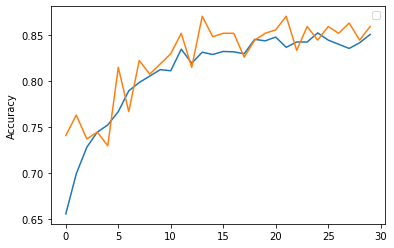

In [80]:
plt.plot(CNN_model.history["accuracy"])
plt.plot(CNN_model.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<AxesSubplot:>

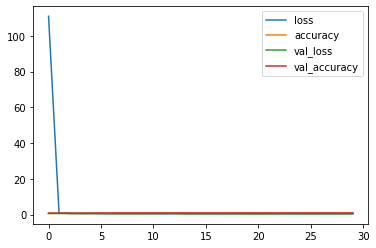

In [81]:
Dict_Summary = pd.DataFrame(CNN_model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [82]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.4637
ACCURACY:  0.82


#### PREDICTION ON PRED DATA
we evaluate our model on unseen dataset

In [83]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [84]:
print(Main_Data_Prediction.head())

               JPG
0  pred/pred18.jpg
1  pred/pred28.jpg
2  pred/pred31.jpg
3  pred/pred21.jpg
4  pred/pred44.jpg


In [85]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [86]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="rgb",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [87]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

In [88]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [89]:
print(Model_Test_Prediction)

[1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]


In [90]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR']


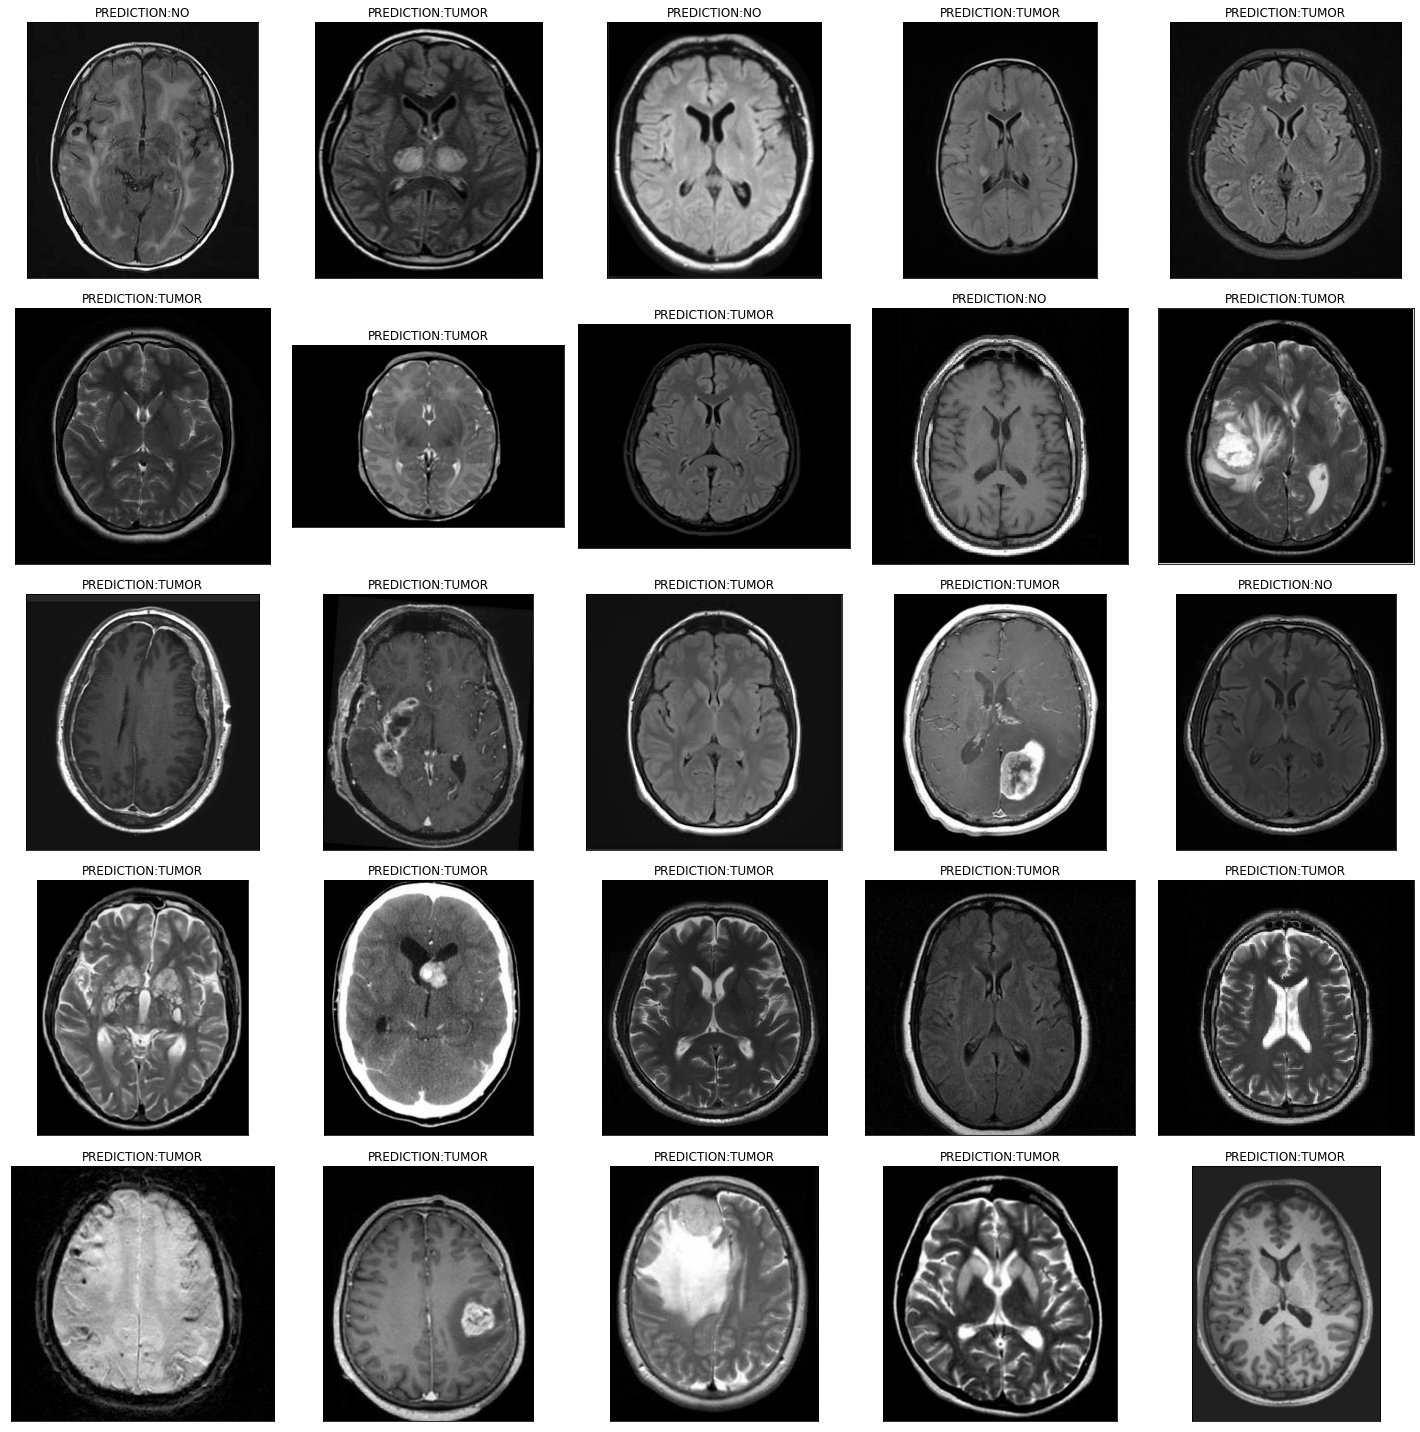

In [91]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

# Shallow ANN Model

In [92]:
ANN_Model = Sequential()

ANN_Model.add(Dense(units=2, activation='relu', input_shape=(200,200,3)))
ANN_Model.add(Dense(units=5, activation='relu'))
ANN_Model.add(Flatten())
ANN_Model.add(Dense(units=2, activation='softmax'))
print(ANN_Model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200, 200, 2)       8         
_________________________________________________________________
dense_7 (Dense)              (None, 200, 200, 5)       15        
_________________________________________________________________
flatten_3 (Flatten)          (None, 200000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 400002    
Total params: 400,025
Trainable params: 400,025
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
#Compiling ANN
ANN_Model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [94]:
#Fitting ANN
ANN_model = ANN_Model.fit(Train_Set, validation_data = Validation_Set, batch_size = 32, epochs = 30)

Epoch 1/30
122/122 [==============================] - 15s 125ms/step - loss: 669.3049 - accuracy: 0.6798 - val_loss: 420.1135 - val_accuracy: 0.7037
Epoch 2/30
122/122 [==============================] - 15s 123ms/step - loss: 380.6370 - accuracy: 0.7132 - val_loss: 164.2754 - val_accuracy: 0.7852
Epoch 3/30
122/122 [==============================] - 15s 123ms/step - loss: 223.5553 - accuracy: 0.7370 - val_loss: 249.0157 - val_accuracy: 0.6667
Epoch 4/30
122/122 [==============================] - 15s 123ms/step - loss: 183.0950 - accuracy: 0.7420 - val_loss: 165.1850 - val_accuracy: 0.7037
Epoch 5/30
122/122 [==============================] - 15s 123ms/step - loss: 136.8418 - accuracy: 0.7333 - val_loss: 90.8723 - val_accuracy: 0.7667
Epoch 6/30
122/122 [==============================] - 15s 124ms/step - loss: 81.5690 - accuracy: 0.7535 - val_loss: 59.8664 - val_accuracy: 0.7556
Epoch 7/30
122/122 [==============================] - 15s 124ms/step - loss: 42.6547 - accuracy: 0.7798 - val

<AxesSubplot:>

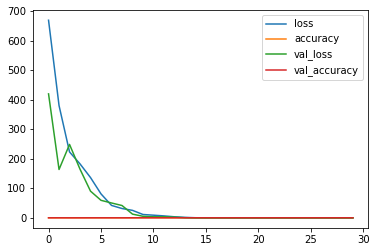

In [95]:
ANN_Dict_Summary = pd.DataFrame(ANN_model.history)
ANN_Dict_Summary.plot()

In [96]:
Model_Results = ANN_Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.3931
ACCURACY:  0.82


# TRANSFER LEARNING

In [48]:
#Import MobileNet Model
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = j(input_shape=(200,200,3), include_top=False)

In [49]:
#Make the layers of the model untrainable
for layer in base_model.layers:
  layer.trainable = False

In [50]:
#Add a flatten and dense layers to the base model
X = Flatten()(base_model.output)
X = Dense(units=2, activation='softmax')(X)
transfer_model = Model(base_model.input, X)

In [51]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 100, 100, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 100, 100, 32)      0     

In [52]:
#Compile the new model
transfer_model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=['accuracy'])

In [53]:
#Early stopping and model checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

est = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')
mct = ModelCheckpoint(monitor ='val_accuracy', filepath = './besttransfermodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cdt = [est, mct]

In [54]:
#Fit our new model
transfer_hist = transfer_model.fit(x = Train_Set, batch_size = 32, epochs = 30, validation_data = Validation_Set, callbacks = cdt, verbose = 1)

Epoch 1/30
122/122 [==============================] - 17s 124ms/step - loss: 4.5562 - accuracy: 0.7132 - val_loss: 1.3205 - val_accuracy: 0.8481

Epoch 00001: val_accuracy improved from -inf to 0.84815, saving model to ./besttransfermodel.h5
Epoch 2/30
122/122 [==============================] - 15s 122ms/step - loss: 2.7193 - accuracy: 0.7992 - val_loss: 1.3419 - val_accuracy: 0.8630

Epoch 00002: val_accuracy improved from 0.84815 to 0.86296, saving model to ./besttransfermodel.h5
Epoch 3/30
122/122 [==============================] - 15s 122ms/step - loss: 1.8728 - accuracy: 0.8663 - val_loss: 0.7560 - val_accuracy: 0.9185

Epoch 00003: val_accuracy improved from 0.86296 to 0.91852, saving model to ./besttransfermodel.h5
Epoch 4/30
122/122 [==============================] - 15s 123ms/step - loss: 1.7553 - accuracy: 0.8798 - val_loss: 0.1808 - val_accuracy: 0.9630

Epoch 00004: val_accuracy improved from 0.91852 to 0.96296, saving model to ./besttransfermodel.h5
Epoch 5/30
122/122 [===

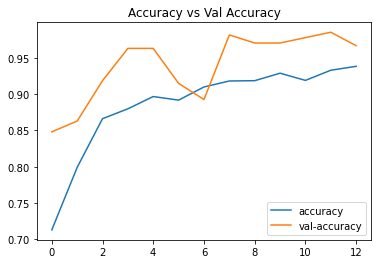

In [55]:
#Plot the graphical interpretation
h = transfer_hist.history
plt.plot(h['accuracy'], label = 'accuracy')
plt.plot(h['val_accuracy'], label = 'val-accuracy')
plt.title('Accuracy vs Val Accuracy')
plt.legend()
plt.show()

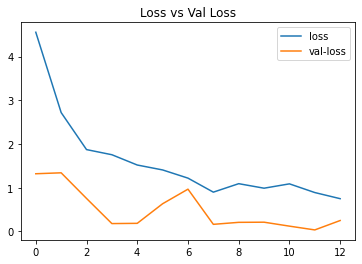

In [56]:
#Plot the graphical interpretation
h = transfer_hist.history
plt.plot(h['loss'], label = 'loss')
plt.plot(h['val_loss'], label = 'val-loss')
plt.title('Loss vs Val Loss')
plt.legend()
plt.show()

In [57]:
#Test our model on the test set
from tensorflow.keras.models import load_model
model = load_model('besttransfermodel.h5')
acc = model.evaluate(Test_Set)
print(f'The accuracy of our model is {acc}')

15/15 [==============================] - 2s 110ms/step - loss: 0.3088 - accuracy: 0.9633
The accuracy of our model is [0.30877915024757385, 0.9633333086967468]
